# 4. SVM线性和非线性拟合

In [1]:
import numpy as np
from scipy import io as spio
from matplotlib import pyplot as plt
from sklearn import svm
%matplotlib inline

In [2]:
def plot_data(X,y):
    plt.figure(figsize=(10,8))
    pos = np.where(y==1)   
    neg = np.where(y==0)    
    p1, = plt.plot(np.ravel(X[pos,0]),np.ravel(X[pos,1]),'ro',markersize=8)
    p2, = plt.plot(np.ravel(X[neg,0]),np.ravel(X[neg,1]),'g^',markersize=8)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend([p1,p2],["y==1","y==0"])
    return plt

In [3]:
def plot_decisionBoundary(X,y,model,class_='linear'):
    plt = plot_data(X, y)
          
    if class_=='linear':
        w = model.coef_
        b = model.intercept_
        xp = np.linspace(np.min(X[:,0]),np.max(X[:,1]),100)
        yp = -(w[0,0]*xp+b)/w[0,1]
        plt.plot(xp,yp,'b-',linewidth=2.0)
        plt.title("Linear fit")
        plt.show()
    else:  
        x_1 = np.transpose(np.linspace(np.min(X[:,0]),np.max(X[:,0]),100).reshape(1,-1))
        x_2 = np.transpose(np.linspace(np.min(X[:,1]),np.max(X[:,1]),100).reshape(1,-1))
        X1,X2 = np.meshgrid(x_1,x_2)
        vals = np.zeros(X1.shape)
        for i in range(X1.shape[1]):
            this_X = np.hstack((X1[:,i].reshape(-1,1),X2[:,i].reshape(-1,1)))
            vals[:,i] = model.predict(this_X)
        plt.title("Nonlinear fit")   
        plt.contour(X1,X2,vals,[0,1],color='blue')
        plt.show()

## 使用线性拟合方式

<module 'matplotlib.pyplot' from 'C:\Users\Techik\Anaconda2\envs\gluon\lib\site-packages\matplotlib\pyplot.pyc'>

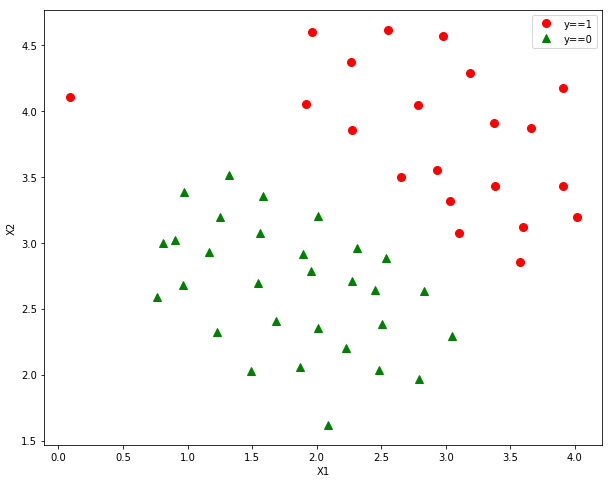

In [4]:
data1 = spio.loadmat('../data/4-SVM/data1.mat')
X_linear_ex = data1['X']
y_linear_ex = data1['y']
y_linear_ex = np.ravel(y_linear_ex)
plot_data(X_linear_ex,y_linear_ex)

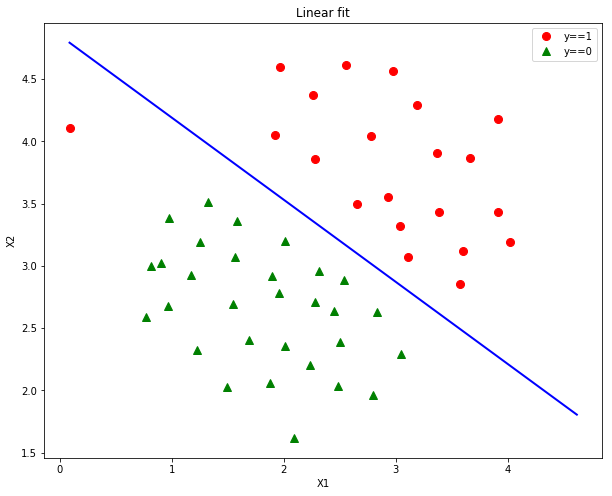

[0]


In [5]:
model = svm.SVC(C=1.0,kernel='linear').fit(X_linear_ex,y_linear_ex) 
plot_decisionBoundary(X_linear_ex, y_linear_ex, model)

# predict the unkonwn data by using model
predict_x = [[ 2  ,  2  ]]
result = model.predict(predict_x)
print result

## 使用非线性进行拟合

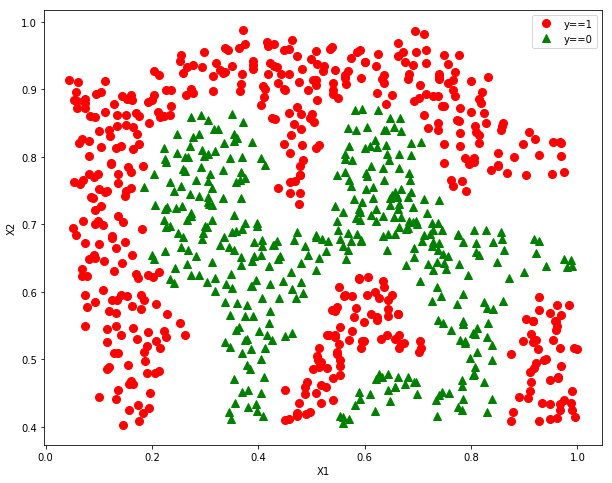

In [6]:
data2 = spio.loadmat('../data/4-SVM/data2.mat')
X_Nonlinear_ex = data2['X']
y_Nonlinear_ex = data2['y']
y_Nonlinear_ex = np.ravel(y_Nonlinear_ex)
plt = plot_data(X_Nonlinear_ex,y_Nonlinear_ex)

C:\Users\Techik\Anaconda2\envs\gluon\lib\site-packages\matplotlib\contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
C:\Users\Techik\Anaconda2\envs\gluon\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'color'
  s)


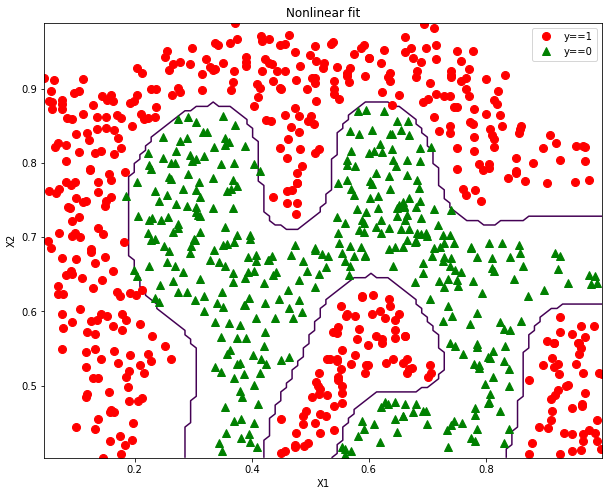

[0]


In [7]:
model = svm.SVC(gamma=100).fit(X_Nonlinear_ex,y_Nonlinear_ex)
plot_decisionBoundary(X_Nonlinear_ex, y_Nonlinear_ex, model,class_='notLinear')

# predict the unkonwn data by using model
predict_x = [[0.4 , 0.7  ]]
result = model.predict(predict_x)
print result

## 对一个数据进行线性和非线性拟合对比

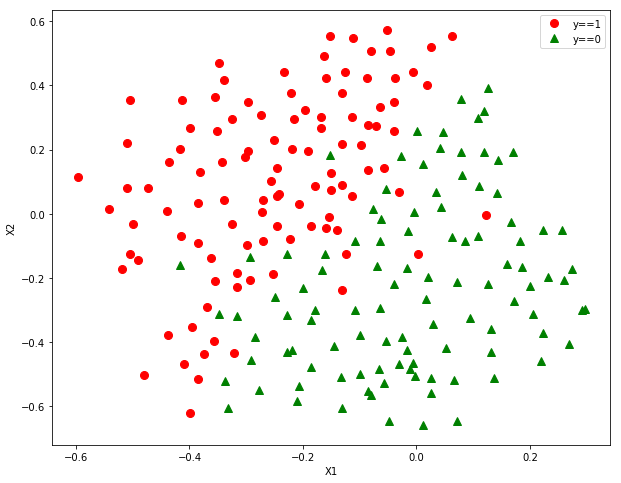

In [8]:
data3 = spio.loadmat('../data/4-SVM/data3.mat')
X_Unknown= data3['X']
y_Unknown = data3['y']
y_Unknown = np.ravel(y_Unknown)
plt = plot_data(X_Unknown,y_Unknown)

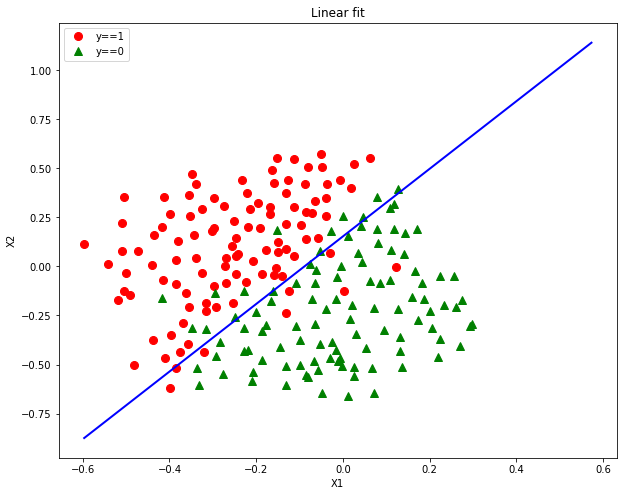

In [9]:
# use the linear to predict
model = svm.SVC(C=1.0,kernel='linear').fit(X_Unknown,y_Unknown) 
plot_decisionBoundary(X_Unknown, y_Unknown, model)

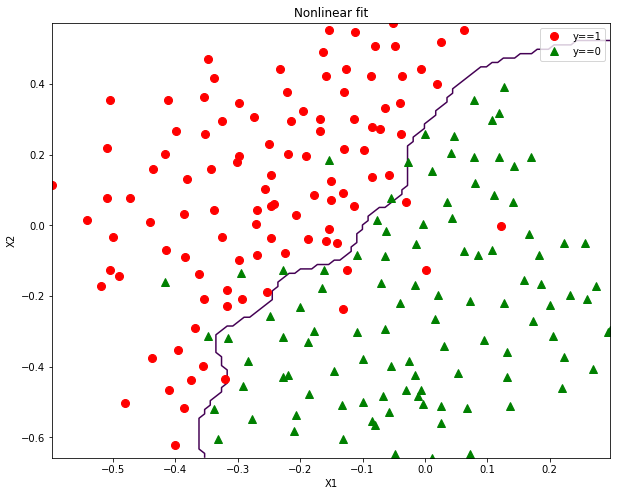

In [10]:
# use the notlinear to predict
model = svm.SVC(gamma=100).fit(X_Unknown,y_Unknown)
plot_decisionBoundary(X_Unknown, y_Unknown, model,class_='notLinear')

### 讨论：
1.怎么判别拟合的好坏？  
2.支持向量机的优势和不足在哪？  